# New Peruvian Food Restaurant in Toronto

## Introduction

**Peruvian food**, in recent years has been recognized internationally as **one of the best food in the world** (Ref: National Geographic [The world's best food destinations in 2019](https://www.nationalgeographic.co.uk/travel/2019/02/worlds-best-food-destinations-2019) ), so its demand has been **increasing** in the main capitals of the world.

## Problem Statement

Toronto is one of the cities with the greatest ethnic diversity in Canada, and therefore multicultural. That's why we want to **open a new Peruvian food restaurant** in this capital, so you want to know which are the districts with the highest and lowest saturation of this type of food. Knowing this, we can choose which is the best location for our new restaurant.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup

Get Postal Codes of Canada

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [3]:
soup = BeautifulSoup(source, 'lxml')

Get only the table of Code Postal

In [4]:
table = soup.find('table',{'class':'wikitable sortable'})

In [5]:
table_rows = table.find_all('tr')

In [6]:
table = []
for ifile in table_rows:
    row = []
    for t in ifile.find_all('td'):
        row =  row + [ t.text.strip() ]
    table.append(row)


table = pd.DataFrame(table, columns=['PostalCode', 'Borough', 'Neighbourhood'])
table.shape

(288, 3)

Remove null date

In [7]:
table = table[~table['PostalCode'].isnull()]
table.shape

(287, 3)

In [8]:
table.head(10)

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned
10,M9A,Downtown Toronto,Queen's Park


Remove data in Borough column with value "Not Assigned"

In [9]:
table = table[table['Borough']!="Not assigned"]
table.shape

(210, 3)

Apply groupby functión and then aggregation in neighbourhood

In [10]:
table = table.groupby(['PostalCode','Borough']).agg(lambda x: ','.join(x))
table.reset_index(inplace=True)
table.head(10)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


Check Neighbourhood with value same to: "Not Assigned"

In [11]:
table[table['Neighbourhood']=="Not assigned"]

,PostalCode,Borough,Neighbourhood
85,M7A,Queen's Park,Not assigned


In [12]:
ListIndexNeigh_NotAssigned = table[table['Neighbourhood']=="Not assigned"].index.values.tolist()
ListIndexNeigh_NotAssigned

[85]

In [13]:
for ind in ListIndexNeigh_NotAssigned:
    table.loc[ind]['Neighbourhood'] = table.loc[ind]['Borough']
    print("---")


---


In [14]:
table.shape

(103, 3)

In [15]:
table[table['Neighbourhood']=="Not assigned"]

,PostalCode,Borough,Neighbourhood


In [16]:
table.head(10)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


## Add Latitude and Longitude

Get latitude and longitude of cocl.us

In [17]:
df_cp_coord = pd.read_csv('https://cocl.us/Geospatial_data')
df_cp_coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Rename Posta code Column

In [18]:
df_cp_coord.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df_cp_coord.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
df = pd.merge(table, df_cp_coord, on='PostalCode')
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [20]:
df.shape

(103, 5)

## Filtred borough with string Toronto

Import Nominatim Library

In [21]:
from geopy.geocoders import Nominatim
import folium

Filter Borough with string Torongo

In [22]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.head(10)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


In [23]:
print('The dataframe of Toronto has {} boroughs and {} neighborhoods.'.format(
        len(df_toronto['Borough'].unique()),
        df_toronto.shape[0]
    )
)

The dataframe of Toronto has 4 boroughs and 39 neighborhoods.


Get one point media of toronto

In [24]:
address = 'East Toronto, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
lat_toronto = location.latitude
lon_toronto = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(lat_toronto, lon_toronto))


The geograpical coordinate of Toronto City are 43.653963, -79.387207.


### The maps of toronto with their neighbourhood

In [25]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = 'YJOZR5RN2W24ACPOJ0VCMPQDL4OSWFH304PTJJDTLYZV1WSM' # your Foursquare ID
CLIENT_SECRET = 'HGFHMKWORFPPG42DYDH40Q3WG0RDGJNBGAA5RE2DDQPDCA0V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# LIMIT OF ITEMS
LIMIT = 100
# RADIUS 
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YJOZR5RN2W24ACPOJ0VCMPQDL4OSWFH304PTJJDTLYZV1WSM
CLIENT_SECRET:HGFHMKWORFPPG42DYDH40Q3WG0RDGJNBGAA5RE2DDQPDCA0V


We have define our function getNearbyVenues

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:

toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [29]:
print(toronto_venues.shape)
toronto_venues.head(10)

(1680, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
5,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West,Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
7,"The Danforth West,Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
8,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
9,"The Danforth West,Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant


Group Neighborhood of Toronto

In [30]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton,Exhibition Place,Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",16,16,16,16,16,16
"Cabbagetown,St. James Town",42,42,42,42,42,42
Central Bay Street,88,88,88,88,88,88
"Chinatown,Grange Park,Kensington Market",91,91,91,91,91,91
Christie,17,17,17,17,17,17


### Check if exists peruvian restaurans in some neighborhood in toronto

In [31]:
"Peruvian" in toronto_venues['Venue Category'].unique()

False

As there are no Peruvian restaurants in Toronto, it is a good opportunity to put one. So the question is: where?


Well it should be located in a district where it does not have much competition, and since Mexican food is one of the top as well as Peruvian food, we must choose a district with the least number of Mexican food restaurants.

### Analyze Each Neighborhood

In [33]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
#print('Neighborhood' in toronto_venues[['Venue Category']])
#print('Neighborhood' in toronto_onehot.columns )
#toronto_onehot['Neighborhood'].shape
print(toronto_onehot.shape)
toronto_onehot.head()


(1680, 238)


,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
"Neighborhood" in toronto_onehot.columns

True

In [35]:
toronto_onehot.columns.get_loc('Neighborhood')

163

#### Sorting columns of Neighborhood

In [36]:
NUMBEF = toronto_onehot.columns.get_loc('Neighborhood')-1
NUMAFT = toronto_onehot.columns.get_loc('Neighborhood')+1
fixed_columns = ['Neighborhood'] + list(toronto_onehot.columns[1:NUMBEF]) + list(toronto_onehot.columns[NUMAFT:-1])
print(len(fixed_columns))
print(fixed_columns)

235
['Neighborhood', 'Airport', 'Airport Food Court', 'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Antique Shop', 'Aquarium', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop', 'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Bed & Breakfast', 'Beer Bar', 'Beer Store', 'Belgian Restaurant', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place', 'Bus Line', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Climbing Gym', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'College Arts Building', 'College Gym', 'College Rec Center', 'Colombian Restaurant', 'Comfort Food Restaurant', 'Comic Shop', 

In [37]:
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
print(toronto_onehot.shape)
toronto_onehot.head()

(1680, 238)


,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
toronto_onehot.shape

(1680, 235)

In [40]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped.head()

(38, 235)


,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.02,0.0,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0,0.0
1,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.00,0.0,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0625,0.0625,0.0625,0.125,0.125,0.125,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0


In [41]:
len(toronto_grouped[toronto_grouped["Mexican Restaurant"]>0])

7

In [42]:
toronto_mexican = toronto_grouped[["Neighborhood","Mexican Restaurant"]]

In [43]:
print(toronto_mexican.shape)
toronto_mexican.head()

(38, 2)


,Neighborhood,Mexican Restaurant
0,"Adelaide,King,Richmond",0.0
1,Berczy Park,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0


In [44]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
          venue  freq
0   Coffee Shop  0.08
1          Café  0.05
2           Bar  0.04
3    Steakhouse  0.04
4  Burger Joint  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3      Farmers Market  0.04
4            Beer Bar  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.10
2     Coffee Shop  0.10
3             Bar  0.05
4    Intersection  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1       Burrito Place  0.06
2       Garden Center  0.06
3      Farmers Market  0.06
4          Smoke Shop  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3      

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Bar,Sushi Restaurant,Salad Place,Restaurant,Burger Joint,Asian Restaurant,Thai Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Steakhouse,Bakery,French Restaurant,Farmers Market,Café,Beer Bar
2,"Brockton,Exhibition Place,Parkdale Village",Café,Coffee Shop,Breakfast Spot,Pet Store,Bakery,Furniture / Home Store,Intersection,Italian Restaurant,Convenience Store,Performing Arts Venue
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Brewery,Garden Center,Recording Studio,Burrito Place,Auto Workshop,Spa,Fast Food Restaurant,Restaurant,Garden
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Service,Airport Terminal,Airport,Boat or Ferry,Plane,Coffee Shop,Rental Car Location,Sculpture Garden,Boutique


#### Find the best number of cluster

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

mms = MinMaxScaler()
toronto_clustering = toronto_mexican.drop(["Neighborhood"], 1)
mms.fit(toronto_clustering)
data_transformed = mms.transform(toronto_clustering)

In [48]:
Sum_of_squared_distances = []
Ksec = range(1,10)
for kind in Ksec:
    km = KMeans(n_clusters=kind).fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)


/home/ibmmagrados/anaconda3/envs/my_env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


### Show the Best value of number of Cluster

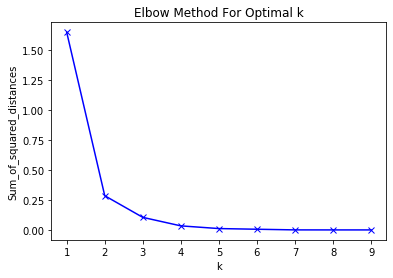

In [50]:

import matplotlib.pyplot as plt

plt.plot(Ksec, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Clustering of Restaurant by Neighborhood

In [51]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=40).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_.shape)
kmeans.labels_[0:10] 

(38,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:

#toronto_merged = toronto_mexican.copy()
toronto_merged = toronto_mexican.copy()

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Mexican Restaurant,Cluster Labels
0,"Adelaide,King,Richmond",0.0,0
1,Berczy Park,0.0,0
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0


In [53]:
df_toronto.rename(columns={"Neighbourhood": "Neighborhood"}, inplace=True)
df_toronto.head()

/home/ibmmagrados/anaconda3/envs/my_env/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [54]:

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_toronto.set_index('Neighborhood'), on='Neighborhood')
print(toronto_merged.shape)
toronto_merged


(38, 7)


,Neighborhood,Mexican Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide,King,Richmond",0.000000,0,M5H,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,0.000000,0,M5E,Downtown Toronto,43.644771,-79.373306
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0,M6K,West Toronto,43.636847,-79.428191
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0,M7Y,East Toronto,43.662744,-79.321558
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420
5,"Cabbagetown,St. James Town",0.000000,0,M4X,Downtown Toronto,43.667967,-79.367675
6,Central Bay Street,0.000000,0,M5G,Downtown Toronto,43.657952,-79.387383
7,"Chinatown,Grange Park,Kensington Market",0.032967,0,M5T,Downtown Toronto,43.653206,-79.400049
8,Christie,0.000000,0,M6G,Downtown Toronto,43.669542,-79.422564
9,Church and Wellesley,0.011765,0,M4Y,Downtown Toronto,43.665860,-79.383160


## Visualization of Cluster of Mexican restaurant

In [55]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [57]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Verifying the number of Mexican restaurants per cluster

In [76]:

medianCluster = {}

for ind in range(0,kclusters):
    medianCluster[ind] = toronto_merged.loc[toronto_merged['Cluster Labels'] == ind]['Mexican Restaurant'].shape[0]
    
medianCluster    

{0: 34, 1: 1, 2: 2, 3: 1}

### Cluster with the highest concentration of Mexican food restaurants

In [79]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0].head(10)

,Neighborhood,Mexican Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide,King,Richmond",0.000000,0,M5H,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,0.000000,0,M5E,Downtown Toronto,43.644771,-79.373306
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0,M6K,West Toronto,43.636847,-79.428191
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0,M7Y,East Toronto,43.662744,-79.321558
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420
5,"Cabbagetown,St. James Town",0.000000,0,M4X,Downtown Toronto,43.667967,-79.367675
6,Central Bay Street,0.000000,0,M5G,Downtown Toronto,43.657952,-79.387383
7,"Chinatown,Grange Park,Kensington Market",0.032967,0,M5T,Downtown Toronto,43.653206,-79.400049
8,Christie,0.000000,0,M6G,Downtown Toronto,43.669542,-79.422564
9,Church and Wellesley,0.011765,0,M4Y,Downtown Toronto,43.665860,-79.383160


## Conclusion 

Although we do not have Peruvian food restaurants in Toronto, it would be very promising to open one in the district where there are more Latin food restaurants.

In cluster 0, we have a great concentration of Mexican restaurants, so this location would be perfect since the public in these neighborhoods likes foreign food, specifically Mexican. That is why we recommend opening a Peruvian food restaurant in this cluster.